## *Análisis del Dataset de insuficiencia cardiaca* heart_failure_clinical_records_dataset.csv de Kaggle

### **Presentado por:**

Angélica Órtiz Álvarez (aortiz016@soyudemedellin.edu.co)

Jhon Jader Diaz Gomez (jdiaz510@soyudemedellin.edu.co)

Cristian Camilo Ospina Metaute (cospina149@soyudemedellin.edu.co)

##### Para iniciar, se importan las librerías requeridas para manipulación de datos y manejo de modelos

In [2]:
import numpy as np 
import pandas as pd
import random
import re
import os
from pathlib import Path
import joblib
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

##### Posteriormente, se carga el dataset procesado previamente heart_failure_clinical_records_extended_cleaned.csv de [Kaggle](https://www.kaggle.com/code/arjunamla02/logistic-regession-vs-decision-tree-vs-rf/notebook) - [UCI Irvine](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)


In [3]:
# Buscar la carpeta raíz del proyecto por nombre
carpeta_actual = os.getcwd()
nombre_proyecto = "ProyectoCienciaDatos"

# Recorrer hacia arriba hasta encontrar la carpeta raíz
while os.path.basename(carpeta_actual) != nombre_proyecto:
    carpeta_actual = os.path.dirname(carpeta_actual)
    if carpeta_actual == os.path.dirname(carpeta_actual):  # Llegamos al tope
        raise FileNotFoundError(f"No se encontró la carpeta raíz '{nombre_proyecto}'.")

# Construir la ruta al archivo CSV
ruta_csv = os.path.join(carpeta_actual, "data", "processed", "heart_failure_clinical_records_extended_cleaned.csv")

# Leer el archivo
df = pd.read_csv(ruta_csv)
df.head()  


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116,0,0,8,1


##### Se imprime el resumen de la estructura del DataFrame, con el objetivo de inspeccionar los datos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1826 non-null   float64
 1   anaemia                   2011 non-null   int64  
 2   creatinine_phosphokinase  1866 non-null   float64
 3   diabetes                  2011 non-null   int64  
 4   ejection_fraction         1941 non-null   float64
 5   high_blood_pressure       2011 non-null   int64  
 6   platelets                 1895 non-null   float64
 7   serum_creatinine          1853 non-null   float64
 8   serum_sodium              2011 non-null   int64  
 9   sex                       2011 non-null   int64  
 10  smoking                   2011 non-null   int64  
 11  time                      2011 non-null   int64  
 12  DEATH_EVENT               2011 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 204.4 KB


# Preprocesamiento y modelado

### Modelo base: diagnóstico inicial sin estandarizar y sin el pipeline

📊 Resultados - Regresión Logística
Accuracy: 0.7509
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       197
           1       0.62      0.55      0.59        92

    accuracy                           0.75       289
   macro avg       0.71      0.70      0.70       289
weighted avg       0.74      0.75      0.75       289



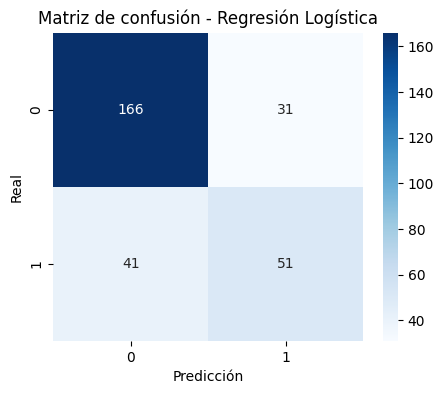


🌲 Resultados - Random Forest
Accuracy: 0.7751
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       197
           1       0.68      0.55      0.61        92

    accuracy                           0.78       289
   macro avg       0.74      0.72      0.73       289
weighted avg       0.77      0.78      0.77       289



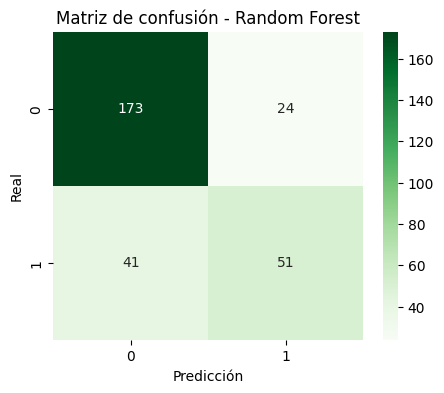

In [5]:
# Se crea una copia del df pero sin valores nulos
df_without_nulls = df.dropna()

# Se crea una copia del df pero sin valores nulos
df_without_nulls = df.dropna()

# Se separa la variable objetivo
X = df_without_nulls.drop('DEATH_EVENT', axis=1)
y = df_without_nulls['DEATH_EVENT']

# Se divide las variables de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Se escalan las variables (Solo para regresion logistica)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 🔹 REGRESIÓN LOGÍSTICA
# ==========================
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("📊 Resultados - Regresión Logística")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ==========================
# 🌲 RANDOM FOREST
# ==========================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🌲 Resultados - Random Forest")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [6]:
# Preparar datos
X = df[[col for col in df.columns if col != 'DEATH_EVENT']]
y = df['DEATH_EVENT']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar shapes antes del entrenamiento
print("\nFormas de los conjuntos de datos:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Formas de los conjuntos de datos:
X_train shape: (1608, 12)
X_test shape: (403, 12)
y_train shape: (1608,)
y_test shape: (403,)


## Pipeline para transformación de datos

### Se crean dos pipelines para las columnas numéricas con el fin de comparar el efecto que tiene en los modelos, e identificar en cual escenario, los modelos se desempeñan mejor

In [7]:

# 2. Definir los features y transformadores
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                   'platelets', 'serum_creatinine', 'serum_sodium', 'time']

boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Pipeline para features numéricas con verificación
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Pipeline para features numéricas con verificación
numeric_transformer_scaler = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Pipeline para features booleanas con verificación
boolean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OneHotEncoder(drop='if_binary')) 
])

# Combinar transformadores
preprocessor_median = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bool', boolean_transformer, boolean_features)
    ],
    verbose=True 
)


# Combinar transformadores
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_scaler, numeric_features),
        ('bool', boolean_transformer, boolean_features)
    ],
    verbose=True 
)

display(preprocessor_median)
display(preprocessor_scaled)

,transformers,"[('num', ...), ('bool', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,True
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


,transformers,"[('num', ...), ('bool', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,True
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1826 non-null   float64
 1   anaemia                   2011 non-null   int64  
 2   creatinine_phosphokinase  1866 non-null   float64
 3   diabetes                  2011 non-null   int64  
 4   ejection_fraction         1941 non-null   float64
 5   high_blood_pressure       2011 non-null   int64  
 6   platelets                 1895 non-null   float64
 7   serum_creatinine          1853 non-null   float64
 8   serum_sodium              2011 non-null   int64  
 9   sex                       2011 non-null   int64  
 10  smoking                   2011 non-null   int64  
 11  time                      2011 non-null   int64  
 12  DEATH_EVENT               2011 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 204.4 KB


### Función para obtener las métricas del modelo

In [9]:
def resumen_clasificación(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    return {"exactitud": acc,
            "precision": prec,
            "recall": recall,
            "f1": f1,
            "roc": roc}

### Se ejecuta cada modelo con cada pipeline creado

In [10]:

# Definir los modelos a probar

modelos = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

print(modelos)
print("----")
print(type(modelos))


# Crear pipelines completos para cada combinación de modelo y preprocesador
pipelines = {} #Nótese que es un diccionario

for modelo_nombre, modelo in modelos.items():
    # Pipeline con imputación mediana (sin escalado)
    pipelines[f"{modelo_nombre}_median"] = Pipeline([
        ("preprocessing", preprocessor_median),
        ("classifier", modelo)
    ])
    # Pipeline con imputación con media + escalado
    pipelines[f"{modelo_nombre}_scale"] = Pipeline([
        ("preprocessing", preprocessor_scaled),
        ("classifier", modelo)
    ])

display(pipelines)

# Entrenar y evaluar cada pipeline
resultados = {}

for nombre_pipeline, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    resultados[nombre_pipeline] = resumen_clasificación(y_test, y_pred)


{'RandomForest': RandomForestClassifier(random_state=42), 'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)}
----
<class 'dict'>


{'RandomForest_median': Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median'))]),
                                                   ['age',
                                                    'creatinine_phosphokinase',
                                                    'ejection_fraction',
                                                    'platelets',
                                                    'serum_creatinine',
                                                    'serum_sodium', 'time']),
                                                  ('bool',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                         

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


In [11]:
# 1. Convertir el diccionario 'resultados' en un DataFrame
df_resultados = pd.DataFrame(resultados).T

# 2. Ordenar por la columna 'exactitud' de manera descendente
df_resultados_sorted = df_resultados.sort_values(by="exactitud", ascending=False)

# 3. Visualizar el DataFrame resultante
df_resultados_sorted

,exactitud,precision,recall,f1,roc
LogisticRegression_median,0.801489,0.701031,0.571429,0.629630,0.734658
LogisticRegression_scale,0.796526,0.694737,0.554622,0.616822,0.726255
RandomForest_median,0.786600,0.670103,0.546218,0.601852,0.716771
RandomForest_scale,0.784119,0.663265,0.546218,0.599078,0.715011


Nota: Se identifica que en general el mejor modelo es el random forest, siendo levemente superior el resultado de exactitud con el modelo no escalado 

In [12]:
# DataFrame para guardar los resultados de cada fold
df_cv_results = pd.DataFrame(columns=["pipeline", "fold", "accuracy"])

# Número de folds
cv_folds = 5

pipelines

{'RandomForest_median': Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median'))]),
                                                   ['age',
                                                    'creatinine_phosphokinase',
                                                    'ejection_fraction',
                                                    'platelets',
                                                    'serum_creatinine',
                                                    'serum_sodium', 'time']),
                                                  ('bool',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                         

In [13]:
for pipeline_name, pipeline_obj in pipelines.items():
    # cross_val_score entrena y evalúa en 5 folds, devolviendo un array con 5 valores de accuracy
    scores = cross_val_score(pipeline_obj, X_train, y_train, cv=cv_folds, scoring="accuracy")

    # Crear un DataFrame temporal con la información de cada fold
    temp_df = pd.DataFrame({
        "pipeline": [pipeline_name]*cv_folds,
        "fold": list(range(1, cv_folds+1)),
        "accuracy": scores
    })

    # Concatenar al DataFrame global
    df_cv_results = pd.concat([df_cv_results, temp_df], ignore_index=True)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


C:\Users\c_cam\AppData\Local\Temp\ipykernel_3580\2089431394.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cv_results = pd.concat([df_cv_results, temp_df], ignore_index=True)


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


In [14]:
# Observa los resultados
df_cv_results.head(20)

,pipeline,fold,accuracy
0,RandomForest_median,1,0.763975
1,RandomForest_median,2,0.795031
2,RandomForest_median,3,0.795031
3,RandomForest_median,4,0.788162
4,RandomForest_median,5,0.760125
5,RandomForest_scale,1,0.763975
6,RandomForest_scale,2,0.791925
7,RandomForest_scale,3,0.788820
8,RandomForest_scale,4,0.788162
9,RandomForest_scale,5,0.766355


### Después de la revisión se encuentra que la regresión logistica da un resultado de 79% de precisión en el fold 1, usando el modelo con la imputación por mediana.

In [15]:
# Creamos el pipeline que integra el preprocesador (preprocessor_median) y el clasificador
pipeline_rf_median = Pipeline([
    ("preprocessing", preprocessor_median),
    ("classifier", RandomForestClassifier(random_state=42))
])
# Definimos el grid de hiperparámetros a explorar
param_grid = {
    "classifier__n_estimators": [50, 100, 200],    # Número de árboles
    "classifier__max_depth": [None, 5, 10],          # Profundidad máxima del árbol (None para sin límite)
    "classifier__min_samples_split": [2, 5, 10]      # Número mínimo de muestras para dividir un nodo
}
# Configuramos GridSearchCV para evaluar con 5 folds y usando la métrica "accuracy"
grid_search_rf = GridSearchCV(
    pipeline_rf_median,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1  # Utiliza todos los cores disponibles
)
# Ejecutamos el grid search usando los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Mostramos los mejores parámetros y el mejor accuracy obtenido en validación cruzada
print("Mejores parámetros:", grid_search_rf.best_params_)
print("Mejor accuracy (CV):", grid_search_rf.best_score_)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
Mejores parámetros: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Mejor accuracy (CV): 0.7916661829298969


In [16]:
# Creamos el pipeline que integra el preprocesador (preprocessor_median) y el clasificador
pipeline_rf_median = Pipeline([
    ("preprocessing", preprocessor_median),
    ("classifier", LogisticRegression(random_state=42))
])

# Definimos el grid de hiperparámetros a explorar
param_grid = {
    "classifier__penalty": ["l2", "none"],  # l1 y elasticnet solo funcionan con solver='saga'
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100],  # Inverso de la regularización
    "classifier__solver": ["lbfgs", "newton-cg", "sag"],  # Algoritmos de optimización
    "classifier__max_iter": [1000, 2500, 5000]  # Número máximo de iteraciones
}

# Configuramos GridSearchCV
grid_search_lg = GridSearchCV(
    pipeline_rf_median,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,  # Utiliza todos los cores disponibles
    verbose=1
)

# Ejecutamos el grid search
grid_search_lg.fit(X_train, y_train)

# Mostramos los mejores parámetros y el mejor accuracy
print("Mejores parámetros:", grid_search_lg.best_params_)
print("Mejor accuracy (CV):", grid_search_lg.best_score_)

# Opcional: mostrar todos los resultados ordenados
resultados_df = pd.DataFrame(grid_search_lg.cv_results_)
resultados_df = resultados_df.sort_values("mean_test_score", ascending=False)
display(resultados_df[["params", "mean_test_score", "std_test_score"]].head())

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
Mejores parámetros: {'classifier__C': 0.01, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Mejor accuracy (CV): 0.7705230161955072


c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\c_cam\Downloads\Pro

,params,mean_test_score,std_test_score
19,"{'classifier__C': 0.01, 'classifier__max_iter'...",0.770523,0.025174
25,"{'classifier__C': 0.01, 'classifier__max_iter'...",0.770523,0.025174
31,"{'classifier__C': 0.01, 'classifier__max_iter'...",0.770523,0.025174
37,"{'classifier__C': 0.1, 'classifier__max_iter':...",0.769281,0.023068
49,"{'classifier__C': 0.1, 'classifier__max_iter':...",0.769281,0.023068


# Guardar los modelos

In [17]:
# Nombre de la carpeta raíz del proyecto
nombre_raiz = "ProyectoCienciaDatos"

# Carpeta actual
carpeta_actual = Path.cwd()

# Buscar hacia arriba hasta encontrar la raíz
for carpeta in [carpeta_actual] + list(carpeta_actual.parents):
    if carpeta.name == nombre_raiz:
        carpeta_raiz = carpeta
        break
else:
    raise FileNotFoundError(f"No se encontró la carpeta raíz '{nombre_raiz}'.")

print("Carpeta raíz:", carpeta_raiz)


Carpeta raíz: c:\Users\c_cam\Downloads\ProyectoCienciaDatos


In [18]:

DATA_DIR = Path.cwd() #/ "Modelos"

# Suponiendo que 'grid_search' es el objeto de GridSearchCV que usamos para el fine-tuning
best_model_rf = grid_search_rf.best_estimator_
best_model_lg = grid_search_lg.best_estimator_

# Imprimir el mejor modelo
print("El mejor modelo Random Forest es:")
print(best_model_rf)

print("El mejor modelo Logistic Regression es:")
print(best_model_lg)

# Guardar el modelo usando joblib con el nombre especificado
joblib.dump(best_model_rf, carpeta_raiz/"models"/"trained" / "heart_failure_clinical_records-random-forest.joblib")
print("Modelo guardado como 'heart_failure_clinical_records-random-forest.joblib'")
joblib.dump(best_model_lg, carpeta_raiz/"models"/"trained" / "heart_failure_clinical_records-logistic_regression.joblib")
print("Modelo guardado como 'heart_failure_clinical_records-logistic_regression.joblib'")

El mejor modelo Random Forest es:
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                           